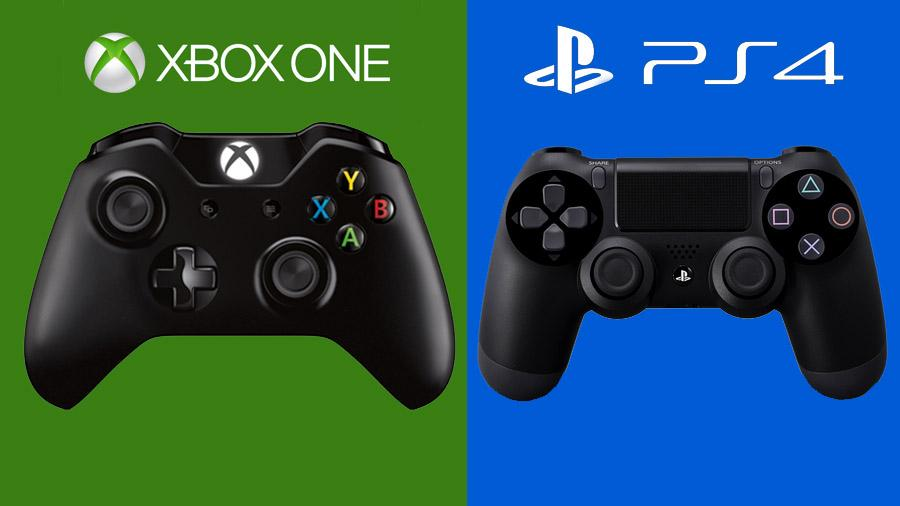

Hey guys! In this notebook I've tried to visualize the differences between PS4 and Xbox One games based on the "Video Game Sales" dataset. 
I can be called as console gamer. I love to play especially RPG games. 
I wanted to make some practise in seaborn data visualization library as a beginner. I hope it would be helpful to those new in data science like me.



# Let's Start

Let's start with importing the libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [ ]:
df = pd.read_csv("../input/videogamesales/vgsales.csv")

I took a quick look to the data here.

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info() # I checked the types of the data if there is any consistency.

In [ ]:
cols  = df.columns

In [ ]:
# In this section, I checked if there is any null value in the data.
for i in df.columns :
    print("{} columns null value is {}".format(i, df[i].isna()))

In [ ]:
df["Platform"].unique()     # I wanted to see all of the platforms here.

Did you just notice that how many of different nintendo platforms are present? You can see almost every platform from gameboy color in which we'd played hours of the famous game Pokémon, to relatively next-gen Wii which was also fun. In fact, I am still playing WiiSports. :)

To make platform-based analysis, I created dedicated datasets.

In [ ]:
xone = df[df["Platform"] == "XOne"]
ps4 = df[df["Platform"] == "PS4"]
wii = df[df["Platform"] == "Wii"]

In [ ]:
xone["Year"].describe()

In [ ]:
ps4["Year"].describe()

In [ ]:
wii["Year"].describe()

I wanted to check the published years of the games by their platform. As we see in the outputs, games from wii platform are in the market before PS4 and Xbox. From 2008 to 2015 that makes 7 years despite 4 in PS4 and 3 in XBox One. 

Nintendo Wii release: 2006

Sony PS4 release: 2013

Microsoft Xbox One release: 2013

In [ ]:
ps4.head()

In this section, we are seeing the most sold games from PS4.

# Sales by Platforms and Publishers

Let's start to visualization of the data.

Firstly, I wanted to see the bar graphic of Publisher and Global Sales from PS4, XBox One and Wii.

In [ ]:
plt.subplots(figsize = (15,10))
sns.barplot(x= "Publisher", y = "Global_Sales", data = ps4.head(100), color = "blue", label = "PS4", ci = None)
sns.barplot(x = "Publisher", y = "Global_Sales", data = xone.head(100), color = "green", label = "Xbox One",ci = None)
sns.barplot(x = "Publisher", y = "Global_Sales", data = wii.head(100), color = "gold", label = "Wii",ci = None)
plt.xticks(rotation = 90)
plt.tick_params(axis = "x", which = "major", labelsize = 11, direction = "out")
plt.xlabel("Publishers", fontsize = 15)
plt.ylabel("Global Sales", fontsize = 15)
plt.legend(title = "Legend", loc = "upper right")
plt.title("Sales between PS4 & XBox One & Wii", fontsize = 20)
plt.savefig("PS4_Xbox_Wii_Sales")
plt.show()

Wow!! It looks like nintendo firm has the most sales all-time by far. It could be due to being in the market more than other rivals. Xbox One could even not have a place in the graphic. We can see a tiny blue area which is PS4 in activision publisher bar. (Call of Duty)

So, I dediced to rule out wii and make the analysis only between PS4 and Xbox One.

In [ ]:
ps4[ps4["Global_Sales"] == ps4["Global_Sales"].max()]

We can see the most sold game in PS4 platform that corresponds the tiny rectangular area in the previous graphic.

# Genres by Consoles

I wanted to seperate the games by their genres and analyze them by their console platform.

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = "Genre", y = "Global_Sales", data = ps4.head(50), palette = "Blues_r", ci = None)
plt.title("Top 100 Genres for PS4", fontsize = 15)
plt.xlabel("Genres",fontsize = 15)
plt.ylabel("Global Sales in millions", fontsize = 15)
plt.tick_params(axis = "x", which = "major", labelsize = 12, direction = "out")
plt.show()

In [ ]:
plt.figure(figsize = (15,10))
sns.barplot(x = "Genre", y = "Global_Sales", data = xone.head(50), palette = "Greens", ci = None)
plt.title("Top 100 Genres for XBox One", fontsize = 15)
plt.xlabel("Genres",fontsize = 15)
plt.ylabel("Global Sales in millions", fontsize = 15)
plt.tick_params(axis = "x", which = "major", labelsize = 12, direction = "out")
plt.show()

After creating the graphs seperately, I wanted to combine them in one graph.

I added ncols to plt.subplots code to achive that.

In [ ]:
fig, (ax1,ax2) = plt.subplots(figsize = (20,10), ncols = 2)
sns.barplot(x = "Genre", y = "Global_Sales", data = ps4.head(50), palette = "Blues_r", ci = None, ax = ax1)
ax1.set_title("Top 100 Genres for PS4", fontsize = 15)
ax1.set_xlabel("Genres",fontsize = 15)
ax1.set_ylabel("Global Sales in millions", fontsize = 15)
ax1.tick_params(axis = "x", which = "major", labelsize = 12, direction = "out")
sns.barplot(x = "Genre", y = "Global_Sales", data = xone.head(50), palette = "Greens", ci = None, ax = ax2)
ax2.set_title("Top 100 Genres for XBox One", fontsize = 15)
ax2.set_xlabel("Genres",fontsize = 15)
ax2.set_ylabel("Global Sales in millions", fontsize = 15)
ax2.tick_params(axis = "x", which = "major", labelsize = 12, direction = "out")
plt.suptitle("PS4 vs XBox One by Genres", fontsize = 15)
plt.savefig("PS4 vs XBox One by Genres")
plt.show()

# Comparison between Years of Console Platforms

After anaylzing the games, this time I wanted to see the course of sales by years of two platforms.

As we can see below, I've combined two different barplots together to have a compact vision.

In [ ]:
fig, (ax1,ax2) = plt.subplots(figsize = (15,10), ncols = 2)
sns.barplot(x = "Year", y = "Global_Sales", data = ps4.head(100), 
            color = "blue", label = "PS4", ci = None, ax = ax1)
sns.barplot(x = "Year", y = "Global_Sales", data = xone.head(100), 
            color = "green", label = "Xbox One", ci = None, ax = ax2)
plt.suptitle("Comparison of PS4 and XBox One over years", fontsize = 15)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Global Sales in millions", fontsize = 15)
plt.tick_params(axis = "x", which = "major", labelsize = 12, direction = "out")
plt.legend()
ax1.legend()
ax1.set_xlabel("Years", fontsize = 15)
ax1.set_ylabel("Global Sales in millions", fontsize = 15)
ax1.tick_params(axis = "x", which = "major", labelsize = 12, direction = "out")
plt.savefig("PS4 vs Xbox One")
plt.show()

I thought that pointplot would be more descriptive the relation between platforms in sales of the games by years.

In [ ]:
plt.subplots(figsize = (15,10))
sns.pointplot(x = "Year", y = "Global_Sales", data = ps4.head(100), color = "blue", 
              label = "PS4", ci = None)
sns.pointplot(x = "Year", y = "Global_Sales", data = xone.head(100), color = "green", 
              label = "Xbox One", ci = None)
plt.xlabel("Years", fontsize = 15)
plt.ylabel("Global Sales in millions", fontsize = 15)
plt.tick_params(axis = "x", which = "major", labelsize = 12, direction = "out")
plt.title("Point Plot of Sales from PS4 and XBox One", fontsize = 15)
plt.legend(["PS4","Xbox One"], fontsize = 12)
plt.savefig("Point Plot PS4 vs Xbox One")
plt.show()


As I thought, point plot show the supremacy of PS4 in global game sales. 

It's now time to get a deeper look. Let's analyze regional sales of games by years.

In [ ]:
plt.subplots(figsize = (15,10))
sns.pointplot(x = "Year", y = "Global_Sales", data = ps4.head(100), color = "navy", 
              label = "PS4 Global", ci = None)
sns.pointplot(x = "Year", y = "NA_Sales", data = ps4.head(100), color = "b", markers = "d",
              label = "PS4 North America", ci = None)
sns.pointplot(x = "Year", y = "EU_Sales", data = ps4.head(100), color = "dodgerblue", linestyles= "--",
              label = "PS4 Europe", ci = None)
sns.pointplot(x = "Year", y = "JP_Sales", data = ps4.head(100), color = "skyblue", 
              label = "PS4 Japan", ci = None)
sns.pointplot(x = "Year", y = "Other_Sales", data = ps4.head(100), color = "cyan", linestyles= ":", 
              label = "PS4 Rest of the World", ci = None)
sns.pointplot(x = "Year", y = "Global_Sales", data = xone.head(100), color = "darkgreen", 
              label = "Xbox One Global", ci = None)
sns.pointplot(x = "Year", y = "NA_Sales", data = xone.head(100), color = "forestgreen", markers = "d",
              label = "Xbox One North America", ci = None)
sns.pointplot(x = "Year", y = "EU_Sales", data = xone.head(100), color = "green", linestyles= "--",
              label = "Xbox One Europe", ci = None)
sns.pointplot(x = "Year", y = "JP_Sales", data = xone.head(100), color = "lime", 
              label = "Xbox One Japan", ci = None)
sns.pointplot(x = "Year", y = "Other_Sales", data = xone.head(100), color = "lawngreen", linestyles= ":",
              label = "Xbox One Rest of the World", ci = None)

plt.xlabel("Years", fontsize = 15)
plt.ylabel("Global Sales in millions", fontsize = 15)
plt.tick_params(axis = "x", which = "major", labelsize = 12, direction = "out")
plt.title("Point Plot of Sales from PS4 and XBox One", fontsize = 15)
plt.legend(["PS4 Global","PS4 North America","PS4 Europe","PS4 Japan","PS4 Rest of the World",
            "Xbox One Global", "Xbox One North America","Xbox One Europe", "Xbox One Japan",
            "Xbox One Rest of the World"], fontsize = 8, loc = "upper right")
plt.savefig("Point Plot PS4 vs Xbox One_2")
plt.show()


# Total Platform Analysis

After getting a look of regional game sales from PS4 and XBox One, I wanted to look that how many games from the platforms are present in the dataset. 

In [ ]:
df["Platform"].value_counts()

In [ ]:
platform = df.Platform.value_counts()

In [ ]:
platform.index

In [ ]:
plt.figure(figsize = (10,15))
sns.barplot(x = platform.values, y = platform.index, 
            palette = "Set2", ci = None, orient = "h")
plt.tick_params(axis = "y", which = "major", labelsize = 12, direction = "out")
plt.tick_params(axis = "x", which = "major", labelsize = 12, direction = "out")
plt.ylabel("Platforms", fontsize = 15)
plt.xlabel("Count", fontsize = 15)
plt.title("Platforms distrubiton", fontsize = 15)
plt.savefig("Platforms Distrubiton")
plt.show()


In this horizontally oriented barplot, we see that nintendo DS and Sony PS2 have almost equal numbers of games. After that, PS3, Wii and Xbox 360 have similar numbers of games published. PC has a lower place in the number of published games than consoles.

If we look to PS4 and Xbox One, PS4 has more games than Xbox One. The difference may be a result from PS4 exlusive games. Also it could be from the absense of data from XBox One S which was released in 2016.

# Analysis of the Platforms game by game.

In this section I wanted to visualize the sales difference of PS4 and Xbox One game by game.

First thing to do was to determine mutual games which were released both from PS4 and Xbox One.

In [ ]:
ps_uniq = ps4["Name"].unique() # Games released for PS4
xbox_uniq = xone["Name"].unique() # Games released for Xbox One

In [ ]:
ps_uniq.shape

In [ ]:
xbox_uniq.shape

We can see from the outputs, games released from PS4 are more than Xbox One by 123.

In [ ]:
uniq_games = []             # In this loop, I will make a list from mutual games.
for i in xbox_uniq :        # Since games from Xbox One were fewer, I started the loop with Xbox One.
    if i in ps_uniq:
        uniq_games.append(i)
    

In [ ]:
uniq_games

In [ ]:
len(uniq_games)

Here we are seeing the list of 182 mututal games.

The next step is to create a new dataframe which contains the data of only mutual games.

In [ ]:
df1 = df[df.Name.isin(uniq_games)]

In [ ]:
df1.shape

After having only mutual games' data, the next step is narrowing the dataset to only PS4 and Xbox One platforms.

In [ ]:
plats = ["PS4", "XOne"]
df2 = df1[df1.Platform.isin(plats)]

In [ ]:
df2

**Voila**!  

Here we have the mutual games of both PS4 and Xbox One.

In [ ]:
df2.Name.nunique()

I checked the number if there is any leaking.

Having created the data, It is now easy to visualize it. :)

In [ ]:
plt.figure(figsize = (20,40))
sns.barplot(x = "Global_Sales", y = "Name", data = df2, hue = "Platform",
            palette = {"PS4": "blue", "XOne": "green"}, ci = None)    # I defined the colors in the palette section by creating a dict.
plt.xlabel("Global Sales in millions", fontsize = 25)
plt.ylabel("Games", fontsize = 25)
plt.title("Games vs Global Sales by their Platform", fontsize = 15)
plt.tick_params(axis = "x", which = "major", labelsize = 10, direction = "out")
plt.legend(title = "Platforms", loc = "upper right",labels= ["PS4", "Xbox One"], fontsize = 15, title_fontsize = 15)
plt.savefig("Games by Platform")
plt.show()


Here we are seeing 182 games for both PS4 and Xbox One.

Let's narrow the list to have a better look.

I narrowed the list to top 50 games.

In [ ]:
plt.figure(figsize = (30,20))
sns.barplot(x = "Global_Sales", y = "Name", data = df2.head(50), hue = "Platform",
            palette = {"PS4": "blue", "XOne": "green"}, ci = None)
plt.xlabel("Global Sales in millions", fontsize = 25)
plt.ylabel("Games", fontsize = 25)
plt.title("Games vs Global Sales by their Platform", fontsize = 20)
plt.tick_params(axis = "y", which = "major", labelsize = 15, direction = "out")
plt.tick_params(axis = "x", which = "major", labelsize = 15, direction = "out")
plt.legend(title = "Platforms", loc = "upper right",labels= ["PS4", "Xbox One"], fontsize = 15, title_fontsize = 15)
plt.savefig("Top 50 Games by Platform")
plt.show()


# Conclusion

In the both horizontally oriented graphics and the other above, we can see that games released from PS4 are quite more than XBox One. I think the reason to that may be the "Game Pass" which is a monthly subscription system that allows the players to play more than 100 games included by Microsoft(so independent from your wishlist), that has been updated periodically. Therefore,that could be leading the players to pay a smaller amount to the subscription system which grants access more than 100 games, rather than paying more to any individual game.


I hope you found this notebook beneficial and had fun while reading.



Note: I have nothing to declare for any conflict of interest.
